<a href="https://colab.research.google.com/github/ramank123/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Title** : **Yes Bank Stock Closing Prediction**

**Yes Bank Stock Closing Prediction Dataset Contains Columns namely**

**1) Date** - 

**2) Open**- **Opening Price of Stock on Particular Day**

**3) High**- **Highest Price of Stock on Particular Day**

**4) Low**- **Lowest Price of Stock on Particular Day**

**5) Close** -**Closing Price of Stock on Particular Day**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.model_selection import train_test_split

## **Load Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices (1).csv')

In [6]:
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
df.shape

(185, 5)

In [ ]:
df.info

<bound method DataFrame.info of        Date   Open   High    Low  Close
0    Jul-05  13.00  14.00  11.25  12.46
1    Aug-05  12.58  14.88  12.55  13.42
2    Sep-05  13.48  14.87  12.27  13.30
3    Oct-05  13.20  14.47  12.40  12.99
4    Nov-05  13.35  13.88  12.88  13.41
..      ...    ...    ...    ...    ...
180  Jul-20  25.60  28.30  11.10  11.95
181  Aug-20  12.00  17.16  11.85  14.37
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

[185 rows x 5 columns]>

In [ ]:
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [12]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [15]:
len(df[df.duplicated()])

0

In [7]:
#importing datetime
from datetime import datetime 
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,"%b-%y"))

In [11]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

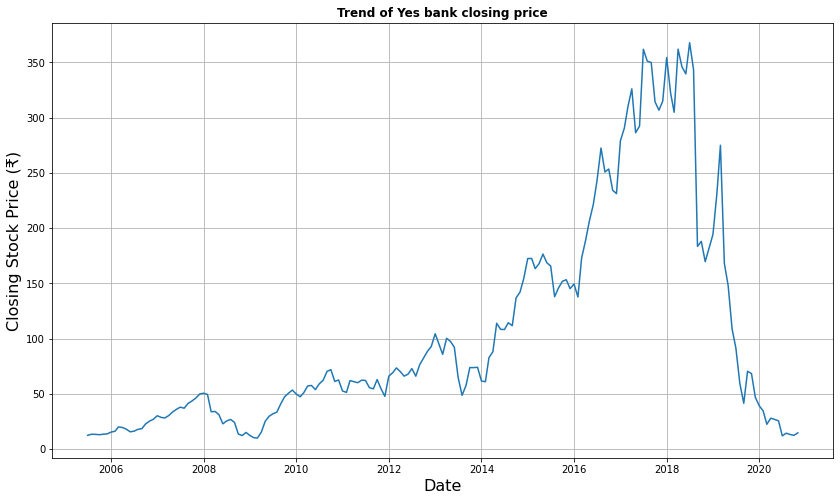

In [16]:
# trend of dependent variable 
plt.figure(figsize = (14,8))
plt.grid(True)
plt.title('Trend of Yes bank closing price',fontweight = 'bold')
plt.plot(df['Date'],df['Close'])
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Closing Stock Price (₹)',fontsize = 16)
plt.show()

Text(0, 0.5, 'Density')

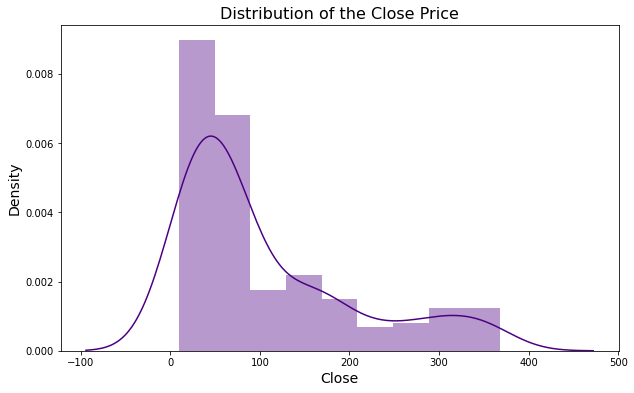

In [17]:
#Checking the distribution of our dependent variable 
plt.figure(figsize = (10,6))
sns.distplot(df['Close'],color = 'indigo')
plt.title('Distribution of the Close Price',fontsize = 16)
plt.xlabel('Close',fontsize = 14)
plt.ylabel('Density',fontsize = 14)

Text(0.5, 1.0, 'Distribution of the Close Price after log transformation')

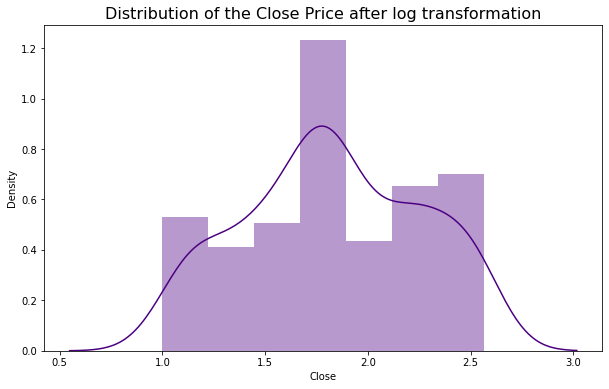

In [21]:
#Distribution after applying Log Transformation
plt.figure(figsize = (10,6))
sns.distplot(np.log10(df['Close']),color = 'indigo')
plt.title('Distribution of the Close Price after log transformation',fontsize = 16)

In [18]:
df.corr()

,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


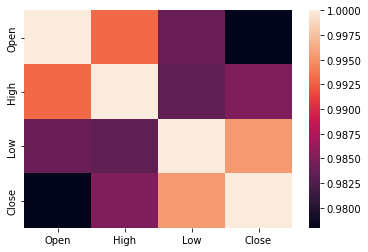

In [19]:
sns.heatmap(df.corr())

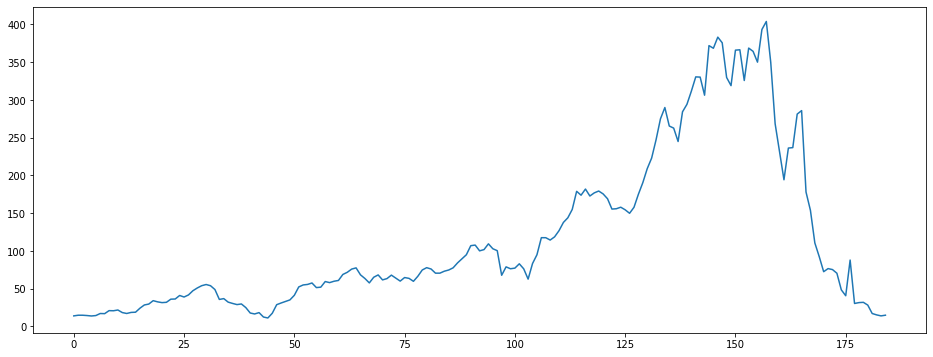

In [ ]:
df['High'].plot(figsize=(16,6))

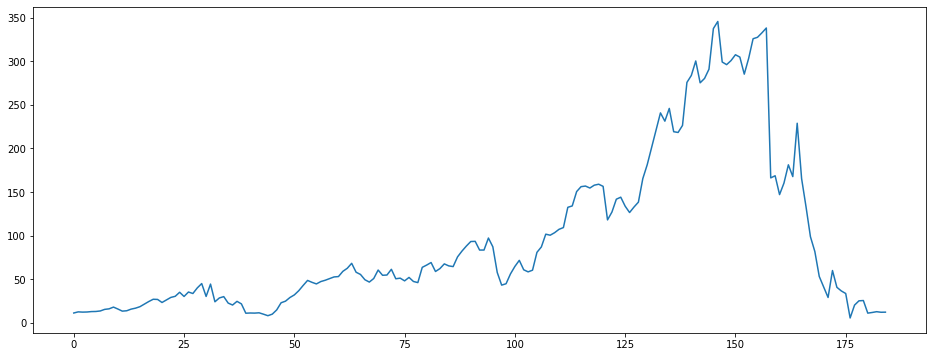

In [ ]:
df['Low'].plot(figsize=(16,6))

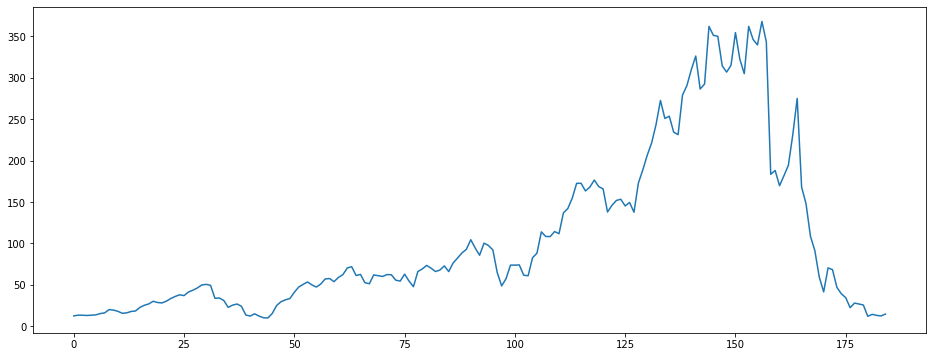

In [ ]:
df['Close'].plot(figsize=(16,6))

# **Split Data**

In [23]:
X=df[['Open', 'High', 'Low']]
y=df['Close']

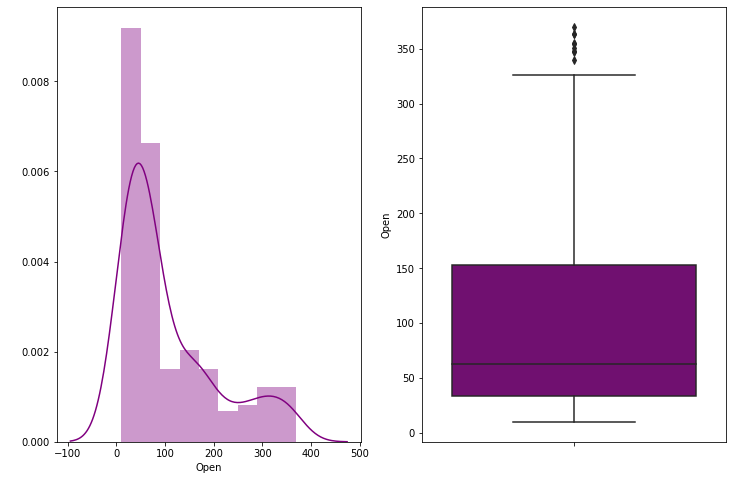

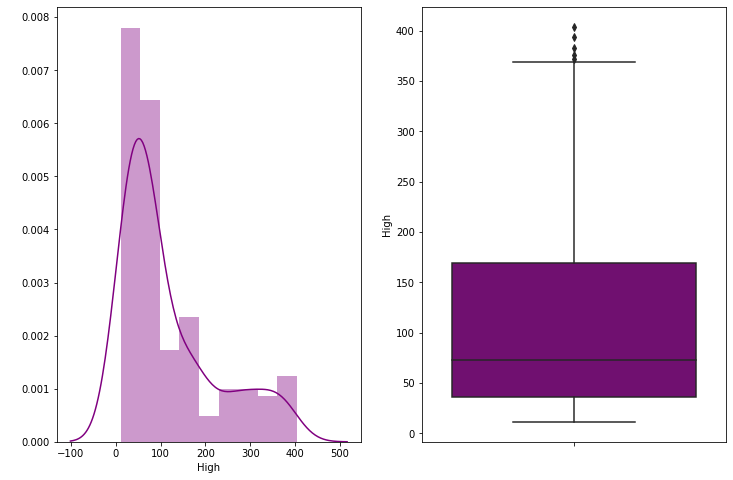

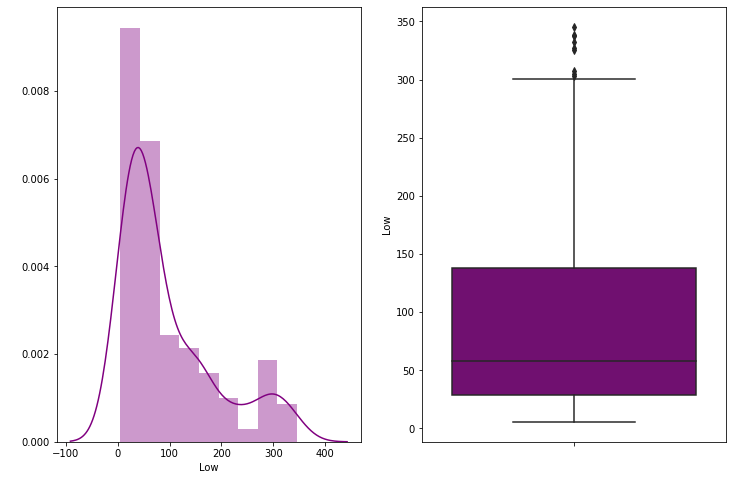

In [28]:
#plot for independent variable
for var in X:
    plt.figure(figsize=(12,8))

    plt.subplot(1, 2, 1)
    fig = sns.distplot(x=df[var],color='purple')
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=df[var],color='purple')
    fig.set_xlabel('')
    fig.set_ylabel(var)

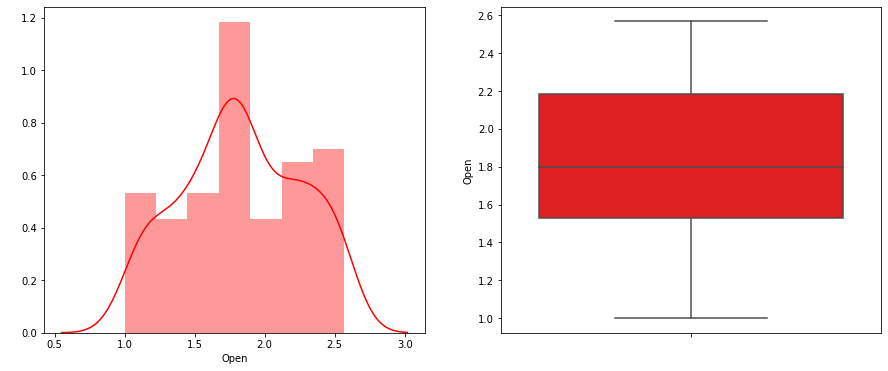

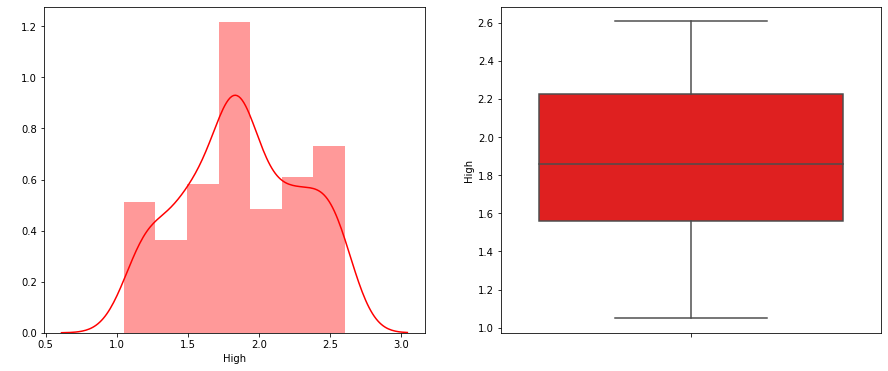

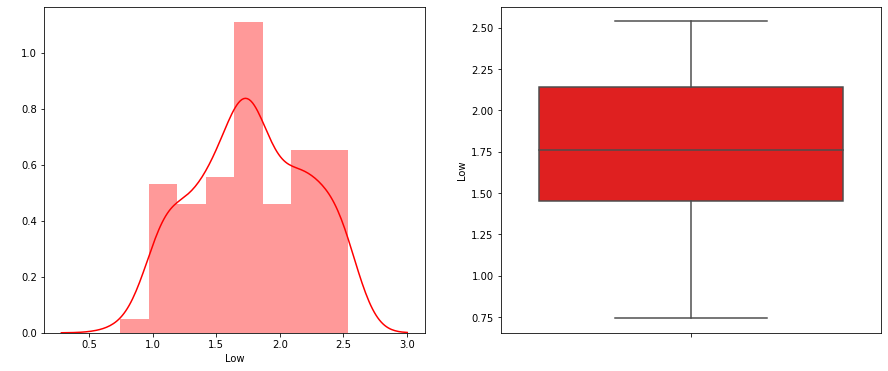

In [31]:
#plot for independent variables
for var in X:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df[var]),color='red')
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(df[var]),color='red')
    fig.set_title('')
    fig.set_ylabel(var)

In [ ]:
X

,Open,High,Low
0,13.00,14.00,11.25
1,12.58,14.88,12.55
2,13.48,14.87,12.27
3,13.20,14.47,12.40
4,13.35,13.88,12.88
...,...,...,...
180,25.60,28.30,11.10
181,12.00,17.16,11.85
182,14.30,15.34,12.75
183,13.30,14.01,12.11


In [ ]:
y

0      12.46
1      13.42
2      13.30
3      12.99
4      13.41
       ...  
180    11.95
181    14.37
182    13.15
183    12.42
184    14.67
Name: Close, Length: 185, dtype: float64

In [ ]:
X.shape

(185, 3)

In [ ]:
y.shape

(185,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=51)

In [ ]:
X_train

,Open,High,Low
32,48.90,48.90,24.11
27,41.80,47.30,33.60
58,56.94,58.08,50.66
64,72.20,77.60,58.00
158,347.20,350.00,166.15
...,...,...,...
105,83.45,94.98,80.80
180,25.60,28.30,11.10
149,307.20,319.00,300.65
16,22.80,28.47,21.40


In [ ]:
X_test

,Open,High,Low
7,15.50,16.97,15.40
23,33.89,36.38,30.40
10,19.80,21.80,15.80
65,61.80,68.36,55.44
21,27.00,31.99,26.20
36,22.85,30.50,20.40
35,31.22,32.22,22.62
31,50.88,53.97,44.40
4,13.35,13.88,12.88
73,62.90,63.96,50.51


In [ ]:
y_train

32      33.75
27      43.48
58      57.57
64      61.21
158    183.45
        ...  
105     88.14
180     11.95
149    315.05
16      25.32
57      57.10
Name: Close, Length: 148, dtype: float64

In [ ]:
y_test

7       16.12
23      35.98
10      18.03
65      62.54
21      30.31
36      25.45
35      22.85
31      49.42
4       13.41
73      55.61
89      92.84
166    147.95
68      61.98
14      18.46
78      65.99
121    137.90
42      12.24
171     70.45
101     74.02
59      53.83
108    108.21
13      17.84
100     73.74
51      47.31
45      15.45
8       20.08
146    350.00
150    354.45
151    322.25
113    154.57
50      40.99
91      94.50
162    194.30
152    304.90
90     104.41
120    165.74
19      28.63
Name: Close, dtype: float64

# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
X_train

array([[-0.60671351, -0.66437811, -0.80809952],
       [-0.67865198, -0.67944306, -0.70380284],
       [-0.52525079, -0.57794298, -0.5163106 ],
       [-0.37063374, -0.39415064, -0.43564277],
       [ 2.41571547,  2.1706564 ,  0.75294373],
       [ 0.06099709, -0.01780946,  0.04374829],
       [ 1.28293787,  1.18201933,  1.32553141],
       [-0.48897759, -0.33991684, -0.40992578],
       [-0.38380557, -0.40921559, -0.32343317],
       [-0.9786658 , -1.00710563, -0.96426978],
       [-0.16596372, -0.17947516, -0.43882992],
       [-0.38887166, -0.46015394, -0.42630113],
       [ 0.8432013 ,  1.05396728,  0.54248204],
       [-0.74552436, -0.29669928, -1.01207701],
       [ 0.43517845,  0.36248627,  0.50984125],
       [-0.43142681, -0.39330324, -0.3646463 ],
       [-0.91189474, -0.89694322, -0.86975435],
       [-0.43345325, -0.48632928, -0.59807743],
       [-0.46384978, -0.48454032, -0.39871581],
       [-0.26586701, -0.28116355, -0.16946094],
       [-0.48147977, -0.54404686, -0.474

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([-52.48103407,  57.07433116,  93.85723269])

In [ ]:
lr.intercept_

108.10891891891892

In [ ]:
X_test[0,:]

array([-0.94512828, -0.96501794, -0.90382387])

In [ ]:
lr.predict([X_test[0,:]])

array([17.8020681])

In [ ]:
lr.predict(X_test)

array([ 17.8020681 ,  33.92654794,  18.52374447,  62.10009491,
        30.89882274,  26.32212641,  25.08565513,  48.78592009,
        14.68539729,  54.06533564,  95.4424228 , 147.12913188,
        60.91195873,  18.94322146,  58.85724699, 125.46115181,
        14.61176891,  49.86218175,  79.96754059,  57.33621968,
       108.4961324 ,  18.77476457,  69.90108681,  45.21783963,
        15.36357169,  20.20818566, 376.73589199, 347.78860928,
       323.47059934, 147.00593279,  38.26876755,  99.79294181,
       217.65182596, 299.67186013, 105.11761606, 166.90807767,
        30.14394261])

In [ ]:
y_test

7       16.12
23      35.98
10      18.03
65      62.54
21      30.31
36      25.45
35      22.85
31      49.42
4       13.41
73      55.61
89      92.84
166    147.95
68      61.98
14      18.46
78      65.99
121    137.90
42      12.24
171     70.45
101     74.02
59      53.83
108    108.21
13      17.84
100     73.74
51      47.31
45      15.45
8       20.08
146    350.00
150    354.45
151    322.25
113    154.57
50      40.99
91      94.50
162    194.30
152    304.90
90     104.41
120    165.74
19      28.63
Name: Close, dtype: float64

In [ ]:
lr.score(X_test, y_test)

0.9936065208570741